## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
from tensorflow.keras.models import model_from_json
from pathlib import Path
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## Setting Class

In [3]:
class_names = {
    0: 'Not_Tumor', 
    1: 'Tumor'
}

## Model Reading

In [4]:
f = Path("gabor_model/gab_model_structure.json")
model_structure = f.read_text()
model = model_from_json(model_structure)
model.load_weights("gabor_model/gab_model_weights.h5")

2022-03-15 11:15:04.583499: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## User Input

In [5]:
img = cv.imread("user_input/no1.jpg",0) #reading image 

In [6]:
gabor_1 = cv.getGaborKernel((18, 18), 1.5, np.pi/4, 5.0, 1.5, 0, ktype=cv.CV_32F) #initialising the parameters of gabor filter 
filtered_img_1 = cv.filter2D(img, cv.CV_8UC3, gabor_1) # applying gabor filter
cv.imwrite('user_input/test.jpg', filtered_img_1)

True

In [7]:
img = image.load_img("user_input/test.jpg", target_size=(256, 256))

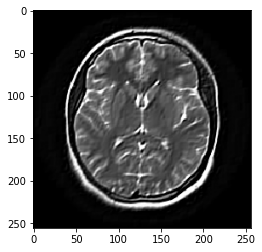

In [8]:
plt.imshow(img)
plt.show()

In [9]:
image_to_test = image.img_to_array(img)

In [10]:
list_of_images = np.expand_dims(image_to_test, axis=0)

In [11]:
results = model.predict(list_of_images)

In [12]:
print(results)

[[1. 0.]]


In [13]:
single_result=results[0]

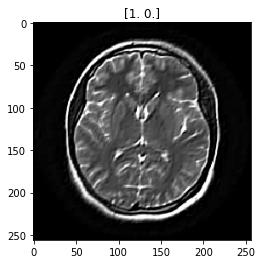

In [14]:
plt.imshow(img)
plt.title(single_result)
plt.show()

In [15]:
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]  

In [16]:
most_likely_class_index

0

In [17]:
class_label = class_names[most_likely_class_index]

In [18]:
print("Predicted class is  {} - Confidence Score: {:2f}".format(class_label, class_likelihood))

Predicted class is  Not_Tumor - Confidence Score: 1.000000
